In [296]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [297]:
df=pd.read_csv("dataset-progetto/train.csv", skipinitialspace=True)

In [298]:
df.isnull().sum() # vedo null

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

## x noia volevo vedere quante canzoni ci sono per artista

In [299]:
df[['name','artists']].describe()

,name,artists
count,15000,15000
unique,15000,6257
top,Long Road,Vybz Kartel
freq,1,80


In [300]:
df["artists"].value_counts()


Vybz Kartel                     80
Germaine Franco                 75
Scooter                         74
Sarah, the Illstrumentalist     69
Jay Chou                        67
                                ..
Fabio Brazza;Péricles            1
Calyx & TeeBee;Calyx;Teebee      1
Stefflon Don                     1
Vybz Kartel;Sheba                1
Cosmic Gate;Nathan Nicholson     1
Name: artists, Length: 6257, dtype: int64

In [301]:
df.corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

C:\Users\lollo\AppData\Local\Temp\ipykernel_14316\22157288.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)


,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
duration_ms,1.000000,-0.048723,-0.076202,-0.080932,0.102996,0.016712,0.039403,-0.023310,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.999918,0.009033,0.839313,0.838041,-0.005830,-0.010400
explicit,-0.048723,1.000000,-0.013096,0.056992,0.124405,-0.000991,0.131777,-0.042846,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,-0.048699,0.051260,-0.039830,-0.039435,0.029119,-0.005878
popularity,-0.076202,-0.013096,1.000000,0.051046,-0.056547,-0.008992,0.046703,0.073043,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,-0.003665,0.008733
danceability,-0.080932,0.056992,0.051046,1.000000,0.193940,0.035311,0.385244,-0.072422,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,0.011602,-0.026273
energy,0.102996,0.124405,-0.056547,0.193940,1.000000,0.057815,0.720907,-0.079969,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,0.040022,-0.037847
key,0.016712,-0.000991,-0.008992,0.035311,0.057815,1.000000,0.047718,-0.157515,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.016786,0.028388,0.027133,0.022042,0.019790,-0.490366
loudness,0.039403,0.131777,0.046703,0.385244,0.720907,0.047718,1.000000,-0.033544,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,0.049174,-0.020563
mode,-0.023310,-0.042846,0.073043,-0.072422,-0.079969,-0.157515,-0.033544,1.000000,-0.064289,0.085246,-0.080035,0.015738,-0.006907,-0.013001,-0.023409,-0.019378,-0.030685,-0.027687,0.003698,0.261129
speechiness,-0.074774,0.294287,-0.096382,0.111454,0.143454,0.018157,0.109793,-0.064289,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,0.026399,-0.022909
acousticness,-0.184902,-0.113975,0.078424,-0.199082,-0.699454,-0.049867,-0.552519,0.085246,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,-0.021155,0.022684


## controllo la popolarità per genere 

In [302]:
df["genre"].value_counts() #conto quanti sono x genere 


j-dance          750
iranian          750
brazil           750
chicago-house    750
forro            750
idm              750
indian           750
study            750
disney           750
afrobeat         750
mandopop         750
techno           750
sleep            750
spanish          750
j-idol           750
industrial       750
happy            750
bluegrass        750
black-metal      750
breakbeat        750
Name: genre, dtype: int64

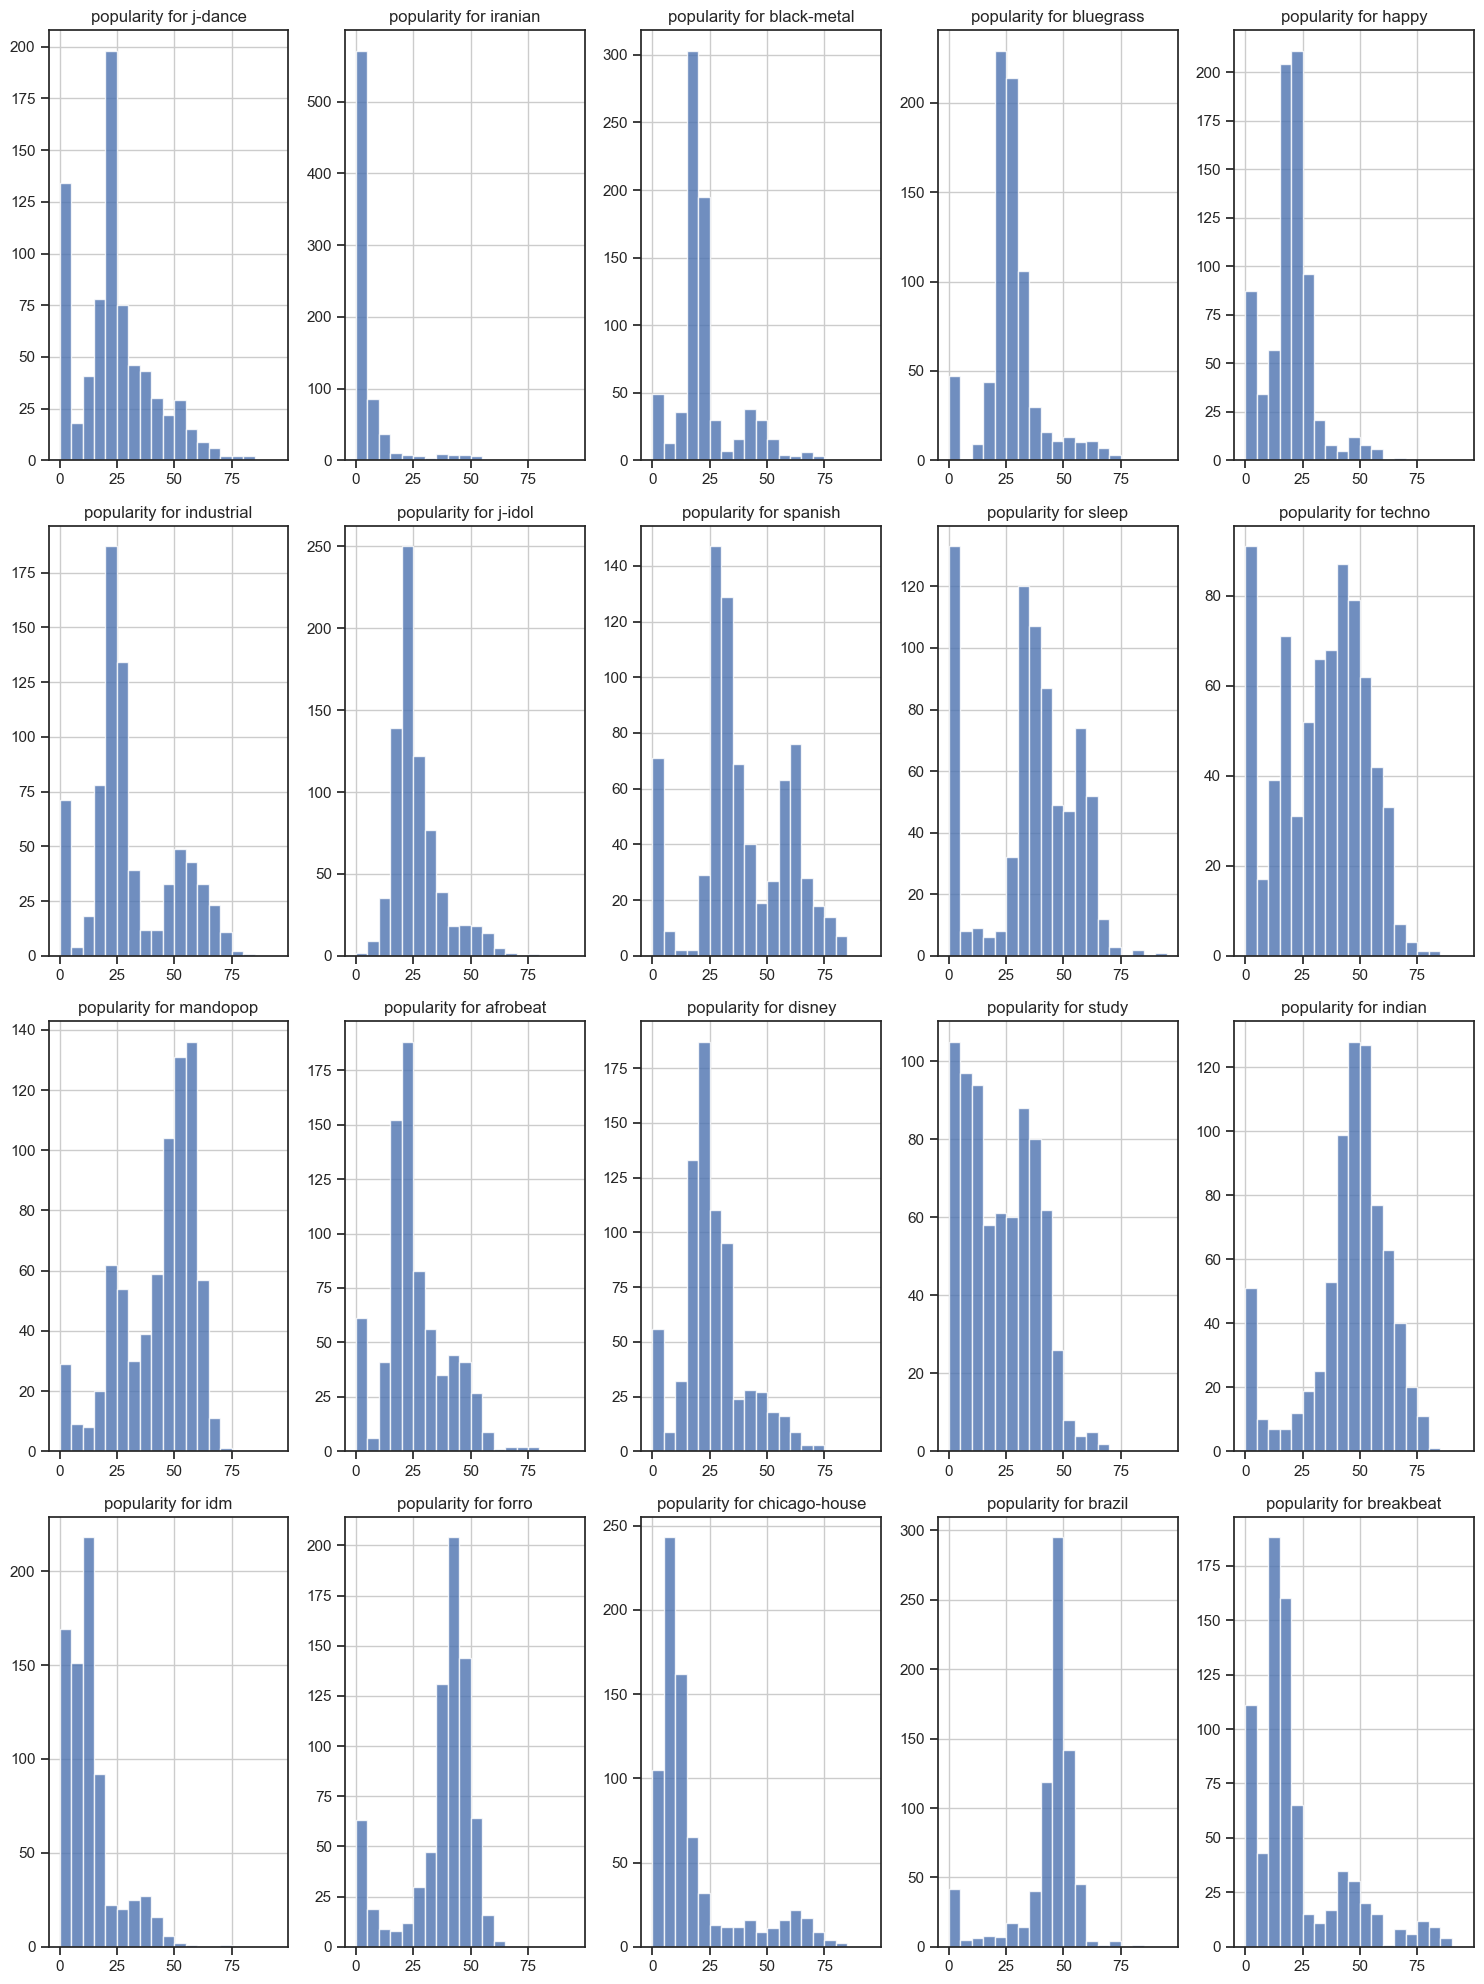

In [303]:
# uso un ciclo x fare un istogramma x la popularity di ogni genre
num_categories = len(df['genre'].unique())  #Calcola il numero di categorie uniche
num_cols = 5  #numero di colonne per la griglia
num_rows = (num_categories + num_cols - 1) // num_cols # Calcola il numero di righe  in base alle colonne
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows)) # Imposta le dimensioni della figura in base al numero di colonne

# Ciclo per ogni categoria unica in 'genre' e disegna l'istogramma su un subplot
for i, v in enumerate(df['genre'].unique()):
    row = i // num_cols
    col = i % num_cols
    plt.sca(axs[row, col])  # Imposta l'asse corrente
    plt.hist(df[df['genre'] == v]['popularity'], bins=np.arange(0,100,5), alpha=0.8, label=v)
    plt.title('popularity for ' + v)
    plt.grid(True)


plt.tight_layout()  #migliore visualizzazione
plt.show()


In [304]:
df.groupby(['genre']).mean() # vedo raggruppato x genere le varie mean

C:\Users\lollo\AppData\Local\Temp\ipykernel_14316\3208279470.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['genre']).mean() # vedo raggruppato x genere le varie mean


,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
genre,,,,,,,,,,,,,,,,,,,,
afrobeat,255761.637333,0.018667,25.104000,0.631279,0.675015,5.372000,-8.225705,0.559322,0.079777,0.274824,0.256546,0.196136,0.632641,119.044092,255556.750667,3.911628,501.882667,128.588000,0.477034,2.218117
black-metal,312680.757333,0.141333,22.160000,0.298734,0.875368,5.504000,-6.508709,0.571977,0.087969,0.027036,0.438376,0.243304,0.194478,128.388135,312676.744000,3.818605,656.552000,171.869333,0.479532,2.167187
bluegrass,224340.145333,0.004000,26.738667,0.538100,0.537173,5.438667,-9.783220,0.833962,0.041848,0.539167,0.132831,0.222549,0.632191,125.319551,224340.520000,3.897991,457.505333,117.208000,0.511243,2.395470
brazil,272329.881333,0.080000,43.029333,0.554036,0.618380,5.357333,-7.759363,0.672381,0.094596,0.334509,0.022967,0.298859,0.466042,121.317551,272320.156000,3.955247,544.018667,137.853333,0.512413,2.191591
breakbeat,297002.881333,0.058667,21.272000,0.655724,0.835011,5.410667,-6.025184,0.587477,0.085956,0.040624,0.363216,0.210023,0.485040,131.591501,297003.284000,3.993846,647.614667,162.260000,0.486670,2.203220
chicago-house,327283.858667,0.024000,17.185333,0.753515,0.736044,5.736000,-8.546865,0.514440,0.072934,0.047374,0.421360,0.147124,0.563743,123.802607,327302.682667,3.982839,671.200000,168.578667,0.485371,2.015716
disney,151753.028000,0.000000,25.397333,0.518562,0.348533,4.386667,-13.748233,0.752363,0.084048,0.690654,0.312890,0.168950,0.441329,115.194593,151753.400000,3.800000,280.060000,73.281333,0.465467,2.486199
forro,202532.865333,0.018667,36.796000,0.632316,0.771311,5.168000,-5.505208,0.658349,0.055037,0.397581,0.013158,0.294420,0.726285,137.302480,202533.365333,3.966049,442.805333,111.184000,0.539073,2.185201
happy,238628.281333,0.117333,19.032000,0.574681,0.907287,5.769333,-5.203780,0.631179,0.112075,0.061112,0.217085,0.281472,0.399956,149.550319,238631.509333,3.962963,591.506667,148.524000,0.545302,2.185718


# What I want study
 
----------------------------------------------------------------------------------------------------------------------------------------------- 

----------------------------------------------------------------------------------------------------------------------------------------------	


##  - connection between these (beacause are all connected with movement)
- danceability: 		Danceability describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable    
- energy: 			Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
- loudness: 			The overall loudness of a track in decibels (dB)
n_beats


In [305]:
df[['danceability','energy','loudness','n_beats','duration_ms']].describe()

,danceability,energy,loudness,n_beats,duration_ms
count,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,0.551063,0.656231,-8.894999,501.862333,2.468075e+05
std,0.194239,0.264371,6.005799,280.689804,1.279941e+05
min,0.000000,0.000000,-49.531000,0.000000,8.586000e+03
25%,0.441000,0.480000,-10.636250,327.000000,1.800000e+05
50%,0.580000,0.709000,-7.303000,461.000000,2.278260e+05
75%,0.695000,0.884000,-5.101000,625.000000,2.889030e+05
max,0.980000,1.000000,3.156000,7348.000000,4.120258e+06


In [306]:
df[['danceability','energy','loudness','n_beats','duration_ms']].corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,danceability,energy,loudness,n_beats,duration_ms
danceability,1.000000,0.193940,0.385244,-0.033604,-0.080932
energy,0.193940,1.000000,0.720907,0.243586,0.102996
loudness,0.385244,0.720907,1.000000,0.165565,0.039403
n_beats,-0.033604,0.243586,0.165565,1.000000,0.839313
duration_ms,-0.080932,0.102996,0.039403,0.839313,1.000000


oki x duration e beat mi ricordo che anche bar fosee molto correlato ,  loudness e energy anche oki 

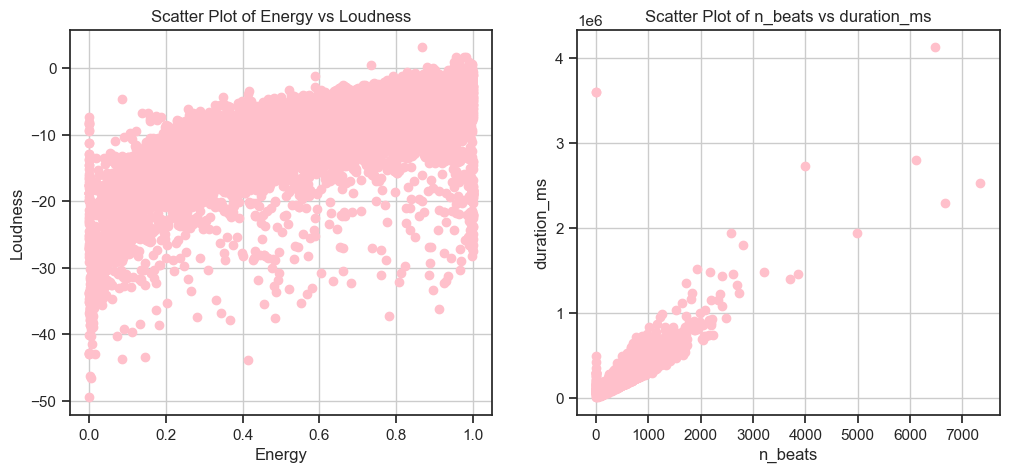

In [307]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primo grafico (Energy vs Loudness)
axes[0].scatter(df['energy'], df['loudness'], color='pink', marker='o')
axes[0].set_xlabel('Energy')
axes[0].set_ylabel('Loudness')
axes[0].set_title('Scatter Plot of Energy vs Loudness')
axes[0].grid(True)

# Secondo grafico (n_beats vs duration_ms)
axes[1].scatter(df['n_beats'], df['duration_ms'], color='pink', marker='o')
axes[1].set_xlabel('n_beats')
axes[1].set_ylabel('duration_ms')
axes[1].set_title('Scatter Plot of n_beats vs duration_ms')
axes[1].grid(True)

guardando bene stanno dei valori un po' più distanti

-----------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------
##  connection with the melody of music
- key:				The key the track is in. Integers map to pitches using standard Pitch Class notation. 
- mode:				Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0
- valence:			A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 


In [308]:
df[['key','mode','valence','key']].corr() # nessuna cazzo di corr diocane

,key,mode,valence,key
key,1.000000,-0.157515,0.028221,1.000000
mode,-0.157515,1.000000,-0.006907,-0.157515
valence,0.028221,-0.006907,1.000000,0.028221
key,1.000000,-0.157515,0.028221,1.000000


In [309]:
df[['key','mode','valence','key']].isnull().sum() 

key           0
mode       4450
valence       0
key           0
dtype: int64

In [310]:
df.groupby(df['genre'])['mode','key','valence'].mean()

C:\Users\lollo\AppData\Local\Temp\ipykernel_14316\3562334654.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(df['genre'])['mode','key','valence'].mean()


,mode,key,valence
genre,,,
afrobeat,0.559322,5.372000,0.632641
black-metal,0.571977,5.504000,0.194478
bluegrass,0.833962,5.438667,0.632191
brazil,0.672381,5.357333,0.466042
breakbeat,0.587477,5.410667,0.485040
chicago-house,0.514440,5.736000,0.563743
disney,0.752363,4.386667,0.441329
forro,0.658349,5.168000,0.726285
happy,0.631179,5.769333,0.399956


 ### NON SO QUANTO POSSA ESSERE GIUSTO : se si intende la mean come ci sono piu 0 o più 1  ALLORA i null di mode si possono prendere dalla KEY o dalla GENRE (Il pitch e la modalità sono due  fattori che possono contribuire a definire il mood complessivo di una composizione musicale.)

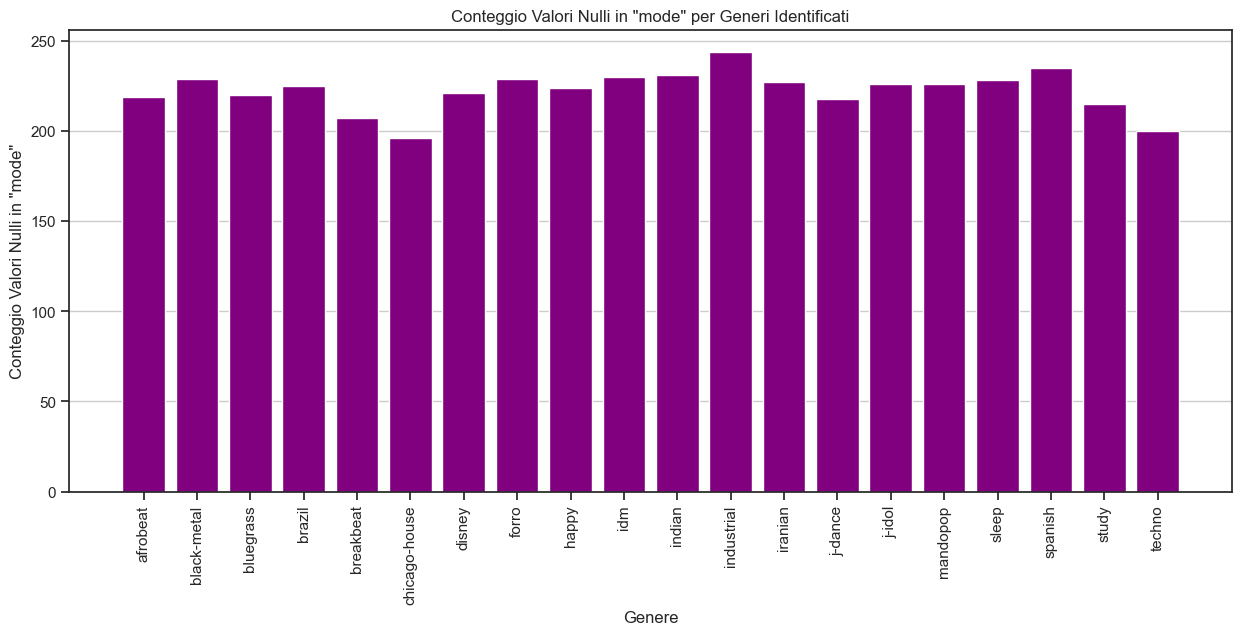

In [311]:
# Estrai i generi identificati in precedenza
generi_con_valori_nulli = df[df['mode'].isnull()]['genre'].unique()

# Filtra il DataFrame originale per questi generi
df_filtrato = df[df['genre'].isin(generi_con_valori_nulli)]

# Calcola il conteggio dei valori nulli in "mode" per ciascun genere
conteggio_valori_nulli = df_filtrato.groupby('genre')['mode'].apply(lambda x: x.isnull().sum())

# Crea un grafico a barre per visualizzare il conteggio dei valori nulli
plt.figure(figsize=(15, 6))
plt.bar(conteggio_valori_nulli.index, conteggio_valori_nulli.values, color='purple')
plt.xlabel('Genere')
plt.ylabel('Conteggio Valori Nulli in "mode"')
plt.title('Conteggio Valori Nulli in "mode" per Generi Identificati')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

#### x ogni genere ci sono poco piu di 200 null , ora non so se questa cosa sia un bene o un male  ..... NON VEDO NULLA CHE AIUTI QUESTA ANALISI O CHE DIMOSTRI QUALCOSA DI UTILE


------------------------------------------------------------------
-------------------------------------------------------------
## correlazioni tra questi attributi:
- duration_ms: 			The track length in milliseconds
- tempo:			The overall estimated tempo of a track in beats per minute (BPM).  
- features_duration_ms:The duration of the track in milliseconds
- time_signature:	An estimated time signature. 

In [312]:
df[["duration_ms","tempo","features_duration_ms","time_signature"]].corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,duration_ms,tempo,features_duration_ms,time_signature
duration_ms,1.000000,0.048765,0.999918,0.009033
tempo,0.048765,1.000000,0.048738,0.215747
features_duration_ms,0.999918,0.048738,1.000000,0.008997
time_signature,0.009033,0.215747,0.008997,1.000000


#### si nota che duration e features duration sono praticamente la stessa cosa , pesno allora che possa essere tolto dal df ...

----------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------
## studio queste relazioni 
- n_beats:			The total number of time intervals of beats throughout the track. 
- n_bars:			The total number of time intervals of the bars throughout the track. 
- x sfizio ho visto anche queste corr n_beats	n_bars	duration_ms	tempo	time_signature	energy

In [313]:
df[["n_beats","n_bars","duration_ms","tempo","time_signature"]].corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,n_beats,n_bars,duration_ms,tempo,time_signature
n_beats,1.000000,0.983696,0.839313,0.455310,0.100644
n_bars,0.983696,1.000000,0.838041,0.434540,0.018492
duration_ms,0.839313,0.838041,1.000000,0.048765,0.009033
tempo,0.455310,0.434540,0.048765,1.000000,0.215747
time_signature,0.100644,0.018492,0.009033,0.215747,1.000000


#### si nota che ci sono corr tra n bars/ n beate duration  (nbar/beat sono molto simili)

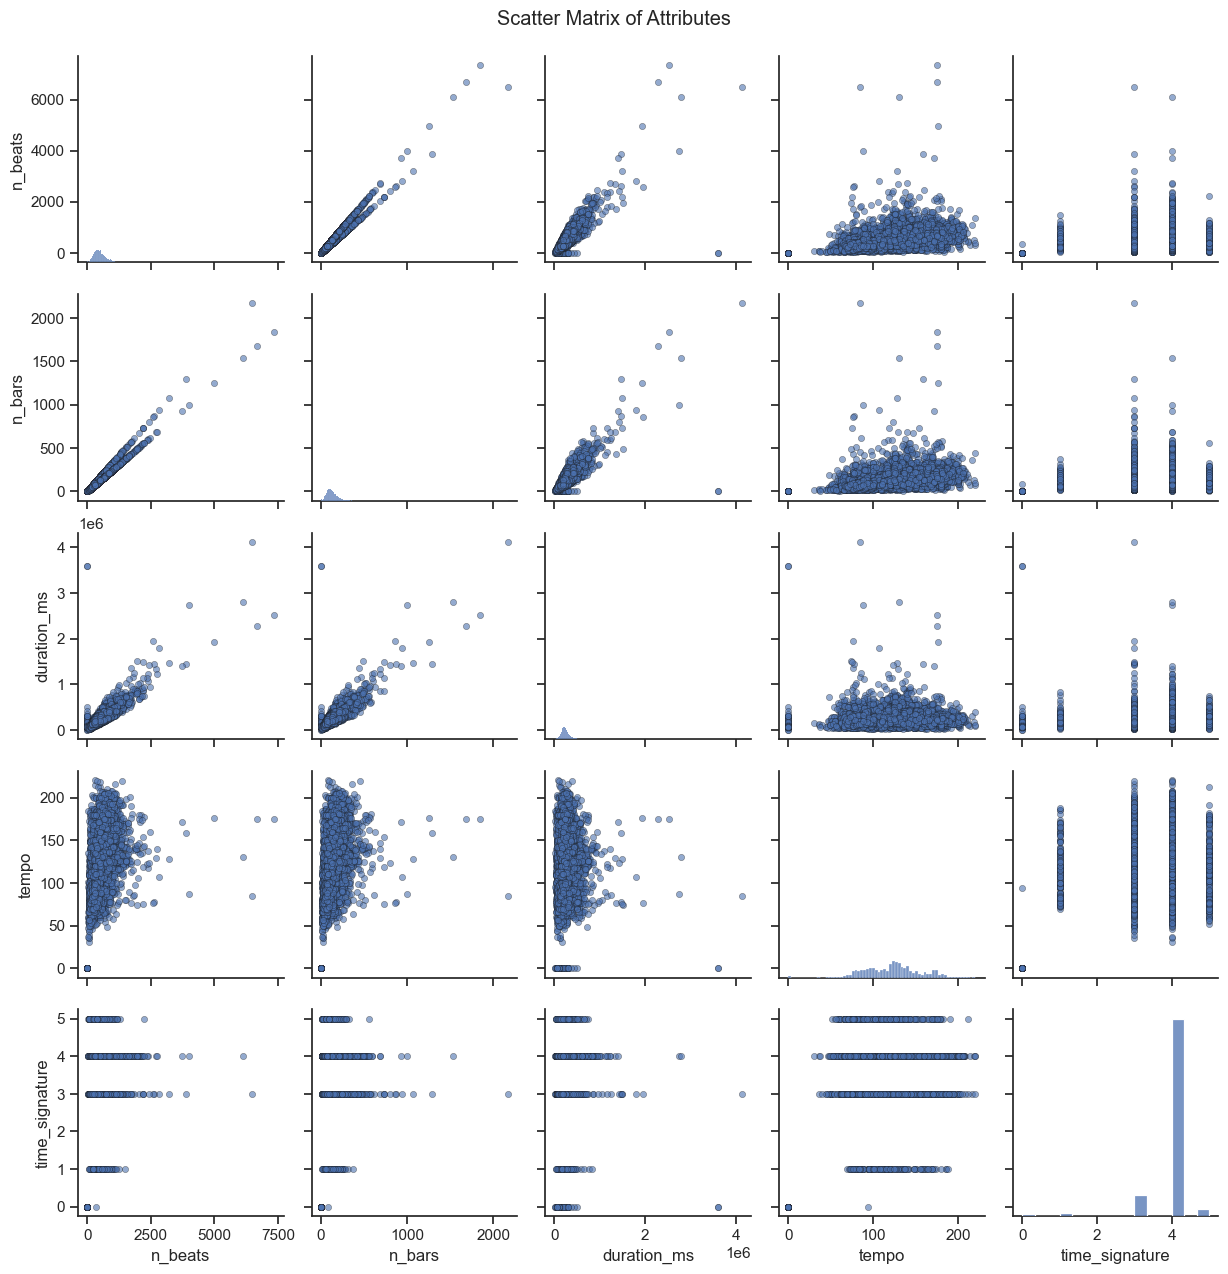

In [314]:
sns.set(style="ticks")
sns.pairplot(df[['n_beats', 'n_bars', 'duration_ms', 'tempo', 'time_signature']], 
             plot_kws={'alpha': 0.6, 's': 20, 'edgecolor': 'k'})
plt.suptitle("Scatter Matrix of Attributes", y=1.02)
plt.show()

#### si nota che ci sono outliar in alcuni attributi ...

Text(0.5, 0, 'Time Signature')

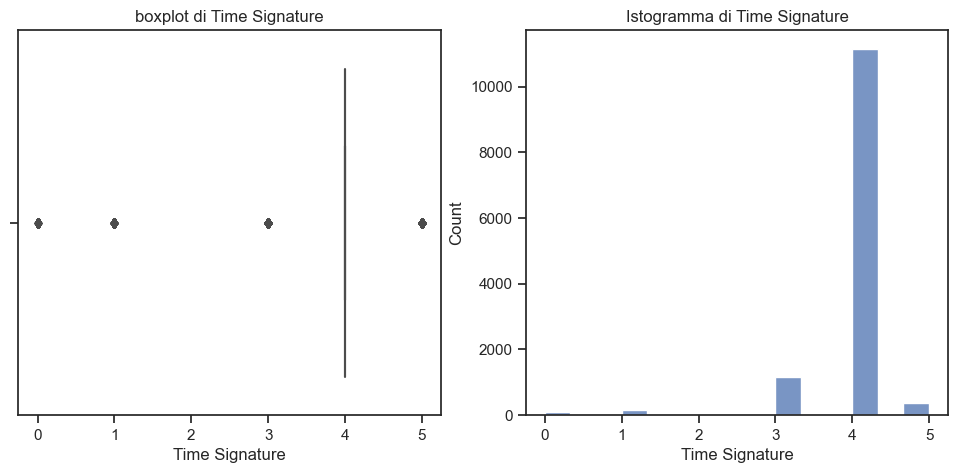

In [315]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=(df["time_signature"]), ax=axes[0]) #primo graph
axes[0].set_title("boxplot di Time Signature")
axes[0].set_xlabel("Time Signature")

sns.histplot(x=df["time_signature"], ax=axes[1]) # second graph
axes[1].set_title("Istogramma di Time Signature")
axes[1].set_xlabel("Time Signature")


c:\Users\lollo\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\lollo\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\lollo\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


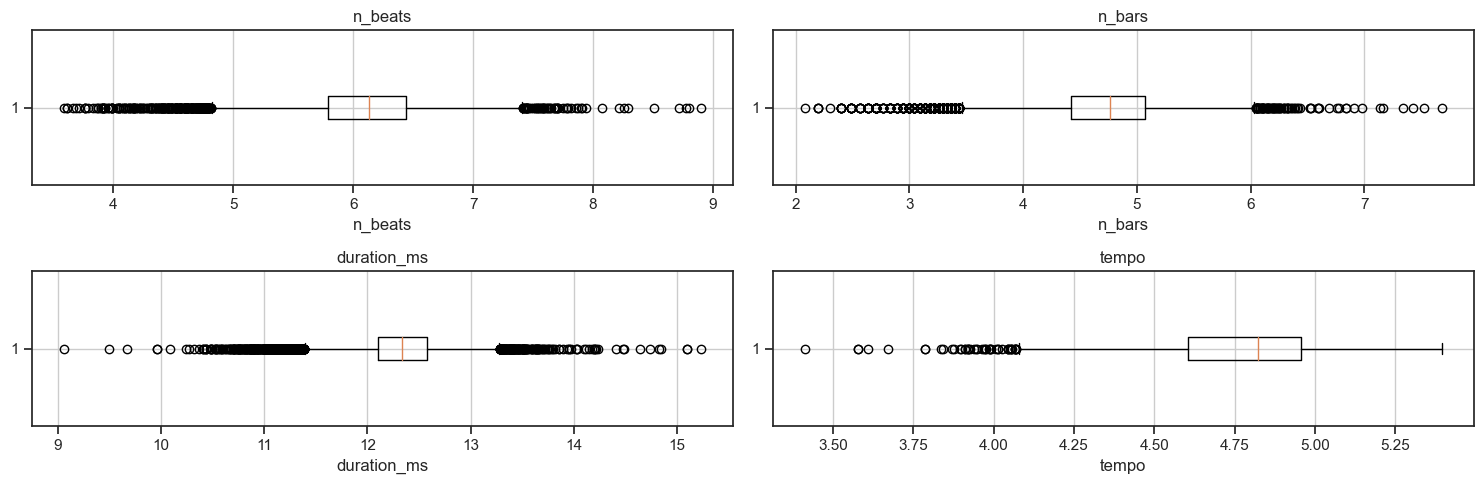

In [316]:
attributes = ["n_beats", "n_bars", "duration_ms", "tempo",]

plt.figure(figsize=(15, 5))
for i, attr in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(np.log(df[attr]), vert=False)  # qui ho normalizzato con il log (np.log)
    plt.title(attr)
    plt.grid(True)
    plt.xlabel(attr)

plt.tight_layout()
plt.show()

ci sono alcuni outliar per esempio in n_beats , duration ms e tempo


------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
## are similar but ...
- popularity_confidence: 	The confidence, from 0.0 to 1.0, of the popularity of the song.
- popularity: 			The popularity of a track is a value between 0 and 100, with 100 being the most popular.

In [317]:
df[["popularity","popularity_confidence"]].corr() # non vedo nulla di che ma vorrei capire meglio ...

,popularity,popularity_confidence
popularity,1.000000,-0.003665
popularity_confidence,-0.003665,1.000000


In [318]:
df[["popularity","popularity_confidence"]].isnull().sum() # ci sono un macello di null forse sarebbe il caso di toglierla pop_conf

popularity                   0
popularity_confidence    12783
dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------
## song with or not words
- n_bars:			The total number of time intervals of the bars throughout the track. 
- speechiness: 			Speechiness detects the presence of spoken words in a track. 
- acousticness:			A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- instrumentalness:		Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0	
- explicit: 			Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)


In [319]:
df[["n_bars","speechiness","instrumentalness","explicit"]].corr().style.background_gradient()

,n_bars,speechiness,instrumentalness,explicit
n_bars,1.000000,-0.040820,0.044498,-0.039435
speechiness,-0.040820,1.000000,-0.115803,0.294287
instrumentalness,0.044498,-0.115803,1.000000,-0.125101
explicit,-0.039435,0.294287,-0.125101,1.000000


forse interessante explicit e spechness

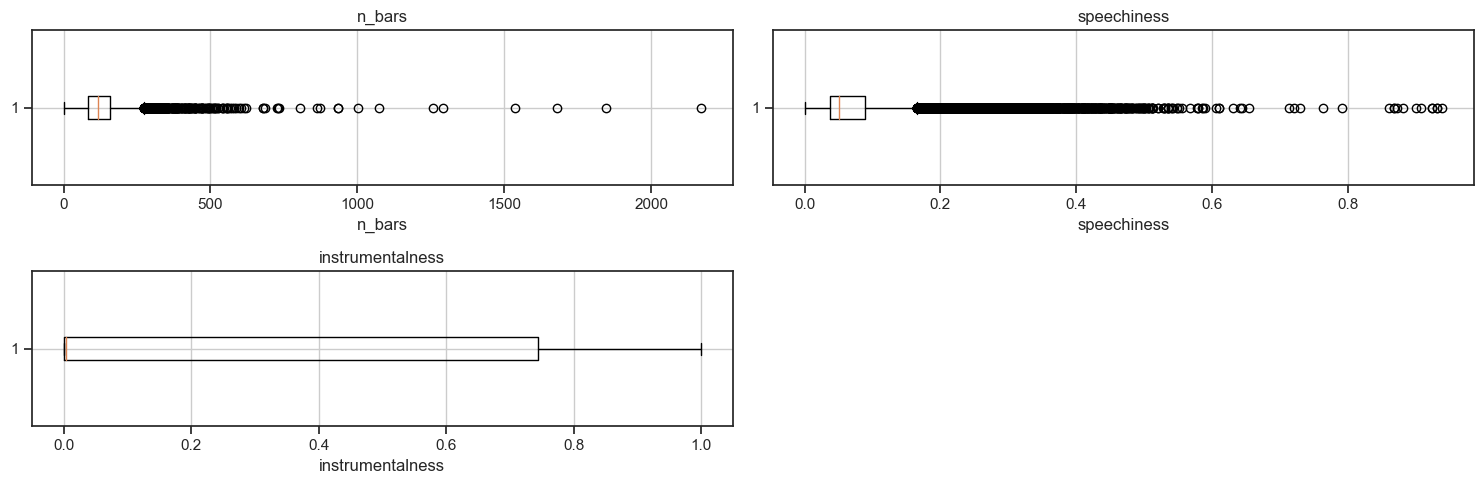

In [320]:
attributes = ["n_bars","speechiness","instrumentalness"]

plt.figure(figsize=(15, 5))
for i, attr in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df[attr], vert=False)
    plt.title(attr)
    plt.grid(True)
    plt.xlabel(attr)

plt.tight_layout()
plt.show()

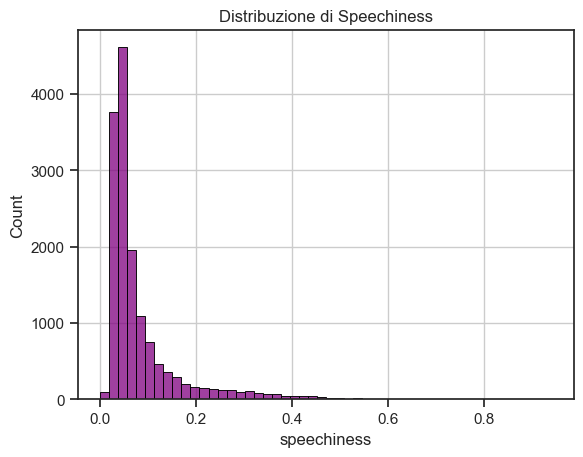

In [321]:
#la distribuzione è spostata a sinistra 

# Imposta i parametri desiderati per l'istogramma
histplot_params = {
    'bins': 50,          # Numero di barre dell'istogramma
    'color': 'purple',   # Colore delle barre
    'edgecolor': 'black'  # Colore dei bordi delle barre
}
plt.grid(True)
sns.histplot(df["speechiness"], **histplot_params)
plt.title("Distribuzione di Speechiness")
plt.show()


In [322]:
df['liveness'].describe()

count    15000.000000
mean         0.216790
std          0.195295
min          0.000000
25%          0.097900
50%          0.131000
75%          0.280000
max          0.994000
Name: liveness, dtype: float64

--------------------------------------------------------------------
--------------------------------------------------------------------

# MISSING VALUE 
- mode : we want try to repopulate missings values using a % for genre calculated by the mean of 0/1 value. 
- time_signature : we used a mode for repopulate missing value because the majority of cases are in value 4.
- popularity_confidence : we decided to eliminate this attribute for the huge amount of missing values.         

## Mode replacing missing values and binarization

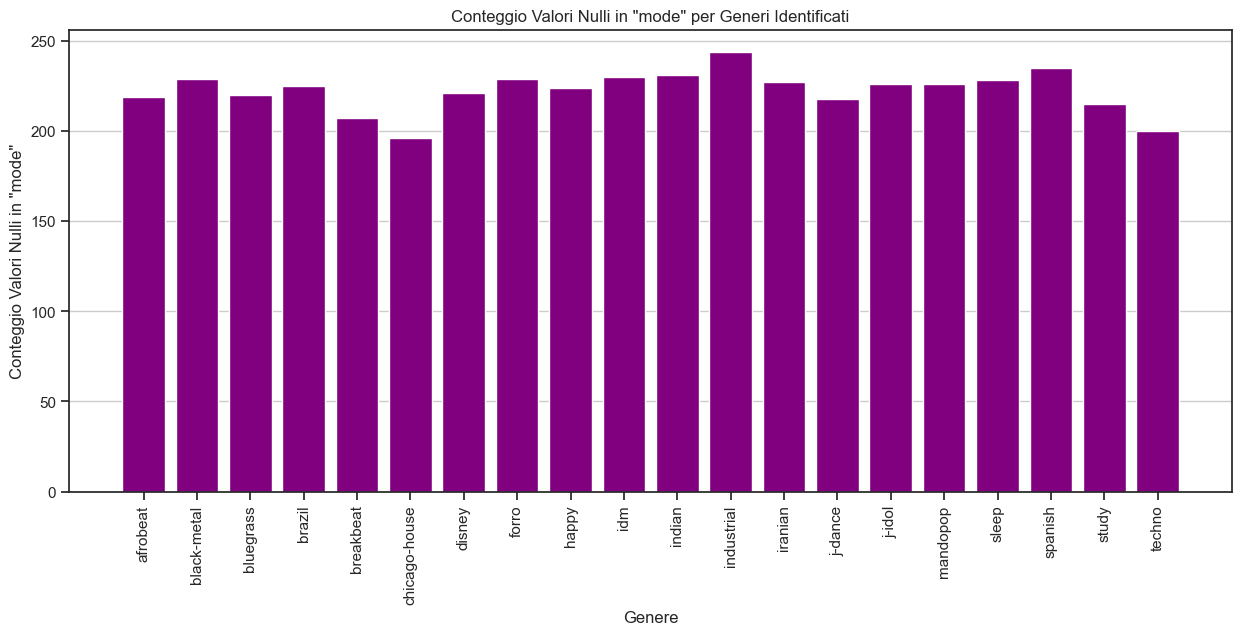

genre
afrobeat         219
black-metal      229
bluegrass        220
brazil           225
breakbeat        207
chicago-house    196
disney           221
forro            229
happy            224
idm              230
indian           231
industrial       244
iranian          227
j-dance          218
j-idol           226
mandopop         226
sleep            228
spanish          235
study            215
techno           200
Name: mode, dtype: int64


In [323]:
# searching how many null values there are for genre and plotting

# Estrai i generi identificati in precedenza
generi_con_valori_nulli = df[df['mode'].isnull()]['genre'].unique()

# Filtra il DataFrame originale per questi generi
df_filtrato = df[df['genre'].isin(generi_con_valori_nulli)]

# Calcola il conteggio dei valori nulli in "mode" per ciascun genere
conteggio_valori_nulli = df_filtrato.groupby('genre')['mode'].apply(lambda x: x.isnull().sum())

# Crea un grafico a barre per visualizzare il conteggio dei valori nulli
plt.figure(figsize=(15, 6))
plt.bar(conteggio_valori_nulli.index, conteggio_valori_nulli.values, color='purple')
plt.xlabel('Genere')
plt.ylabel('Conteggio Valori Nulli in "mode"')
plt.title('Conteggio Valori Nulli in "mode" per Generi Identificati')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

print(conteggio_valori_nulli) # numerical rappresentation

In [324]:
df.corr()['mode']  # now i search correlation of 'mode' with other attributes  

C:\Users\lollo\AppData\Local\Temp\ipykernel_14316\1571872180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mode']  # now i search correlation of 'mode' with other attributes


duration_ms             -0.023310
explicit                -0.042846
popularity               0.073043
danceability            -0.072422
energy                  -0.079969
key                     -0.157515
loudness                -0.033544
mode                     1.000000
speechiness             -0.064289
acousticness             0.085246
instrumentalness        -0.080035
liveness                 0.015738
valence                 -0.006907
tempo                   -0.013001
features_duration_ms    -0.023409
time_signature          -0.019378
n_beats                 -0.030685
n_bars                  -0.027687
popularity_confidence    0.003698
processing               0.261129
Name: mode, dtype: float64

the best correlation is 'processing' so i decided to use the mean for 'genre' of 'mode', with this we can have a numerical idea of the % of 0 & 1 in each genre.
this, for maintenance of mean for repopulation.

In [325]:
a = df.groupby('genre')[['mode']].mean() #calculate mean of 'mode' group by 'genre'
b = df['mode'].mean()
print(b,a)

0.6313744075829384                    mode
genre                  
afrobeat       0.559322
black-metal    0.571977
bluegrass      0.833962
brazil         0.672381
breakbeat      0.587477
chicago-house  0.514440
disney         0.752363
forro          0.658349
happy          0.631179
idm            0.540385
indian         0.689788
industrial     0.588933
iranian        0.562141
j-dance        0.541353
j-idol         0.715649
mandopop       0.769084
sleep          0.706897
spanish        0.644660
study          0.514019
techno         0.583636


In [330]:


# Conta il numero di valori mancanti
missing_count = df['mode'].isna().sum()

# Calcola la percentuale di 0 e 1 in base ai valori esistenti
zero_count = df['mode'].value_counts().get(0, 0)
one_count = df['mode'].value_counts().get(1, 0)

# Ripopola i valori mancanti con 0 e 1 in base alle percentuali
if missing_count > 0:
    zero_to_add = int(round(zero_count / (zero_count + one_count) * missing_count))
    one_to_add = missing_count - zero_to_add
    df['mode'] = df['mode'].fillna(0, limit=zero_to_add).fillna(1, limit=one_to_add).astype(int)

# Stampa il DataFrame risultante solo i valori unique x vedere se non ha messo i float
print(df['mode'].unique())


[1 0]


In [333]:
try_corr = df.groupby('genre')[['mode']].mean() # correlato le 2 media la nuova e la vecchia x vedere se avesse fatto casini 
try_corr.corrwith(genre_mode_mean)


mode    0.986938
dtype: float64